# 3.1 线性回归


介绍了线性模型、损失函数、优化策略、解析解（正规方程）、矢量化加速（矩阵相乘）、生物学神经单元传递

## 3.1.6. 练习
[答案](https://lxblog.com/qianwen/share?shareId=46d4a020-5313-49dc-b86a-84ca2fcc58a1)

# 3.2 从零实现线性回归

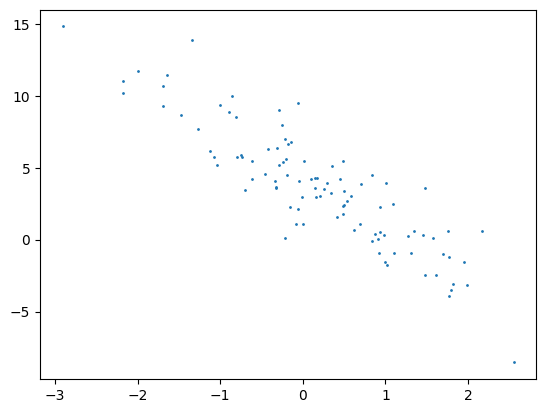

In [1]:
%matplotlib inline
import random
import torch
import matplotlib.pyplot as plt

# 生成数据
def init_data(w, b, num_examples):
    x = torch.normal(0, 1, (num_examples, w.shape[0]))
    y = torch.mm(x, w) + b
    y += torch.normal(0, 0.01, y.shape)

    return x, y

w = torch.tensor([2.0, -3.4]).reshape(2, -1)
b = torch.tensor([4.2])
num_examples = 100

features, labels = init_data(w, b, num_examples)

plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [2]:
# 定义数据加载器
def data_iter(batch_size, features, labels):
    num_features = len(features)
    samper_indices = list(range(num_features))
    # 假设随机采样
    random.shuffle(samper_indices)

    for i in range(0, num_features, batch_size):
        batch_indices = torch.tensor(samper_indices[i:min(i+batch_size, num_features)])
        batch_feature = features[batch_indices]
        batch_lable = labels[batch_indices]
        yield batch_feature, batch_lable

batch_feature, batch_lable = next(data_iter(10, features, labels))

In [3]:
# 定义模型
def linear_model(w, b, x):
    return torch.matmul(x, w) + b

# 定义损失函数
def square_loss(y_hat, y):
    return (y_hat - y) ** 2 / 2

# 定义优化器
def optimizer_sgd(param, lr, batch_size):
    with torch.no_grad():
        param -= lr * param.grad / batch_size
        param.grad.zero_()

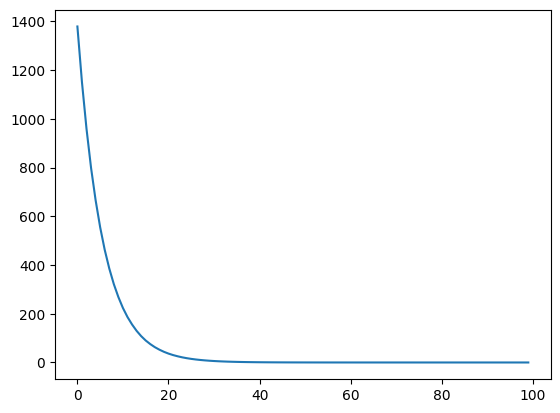

In [6]:
# 超参数
batch_size = 10
lr = 0.01
epochs = 100

w = torch.normal(0, 0.01, (features.shape[1], 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

total_loss_list = []

for epoch in range(epochs):
    total_loss = 0.0
    for batch_feature, batch_lable in data_iter(batch_size, features, labels):
        y_hat = linear_model(w, b, batch_feature)
        loss = square_loss(y_hat, batch_lable)
        loss.sum().backward()
        optimizer_sgd(w, lr, batch_size)
        optimizer_sgd(b, lr, batch_size)

        total_loss += loss.sum().item()
    total_loss_list.append(total_loss)
plt.plot(range(epochs), total_loss_list)

## 3.2.9 练习 
1. 如果我们将权重初始化为零，会发生什么。算法仍然有效吗？
    - 不仅仅初始化模型会失效，就是所有参数都初始化为相同的值都为失效。如果相同的值，样本输入后，输出一定是固定的，计算得到的梯度都是一样的相当于模型参数不会更新。这种现象被称为“对称性破坏”或“死节点”。因此，算法可能无法有效地学习到数据中的复杂模式。

2. 假设试图为电压和电流的关系建立一个模型。自动微分可以用来学习模型的参数吗?
    - 可以的，就是相当于学习电阻这个参数

3. 能基于普朗克定律使用光谱能量密度来确定物体的温度吗？
    - 可以吧，有公式就能推到参数

4. 计算二阶导数时可能会遇到什么问题？这些问题可以如何解决？
    - 计算二阶导数可能会遇到数值稳定性问题，尤其是在梯度消失或爆炸的情况下。这些问题可以通过正则化、梯度裁剪等方法来缓解。

5. 为什么在squared_loss函数中需要使用reshape函数？
    - 保证损失计算是一一对应的

6. 如果样本个数不能被批量大小整除，data_iter函数的行为会有什么变化？
    - 最后一个批次不固定大小呗

# 3.3 线性回归的简单实现

In [1]:
import torch
import torch.nn as nn
import torch.optim.optimizer as optimizer
import torch.utils
import torch.utils.data as data

# 生成数据
def init_data(w, b, num_examples):
    x = torch.normal(0, 1, (num_examples, w.shape[0]))
    y = torch.mm(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y

def init_data_iter(dataset, batch_size, is_shuffle):
    dataset = data.TensorDataset(*dataset)

    return data.DataLoader(dataset, batch_size=batch_size, shuffle=is_shuffle)
w = torch.tensor([2.0, -3.4]).reshape(2, -1)
b = torch.tensor([4.2])
num_examples = 100

dataset = init_data(w, b, num_examples)
batch_size = 10
is_shuffle = True
data_iter = init_data_iter(dataset, batch_size, is_shuffle)

In [ ]:
# 定义模型
net = nn.Sequential(nn.Linear(2, 1))

# 参数初始化
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

# 定义loss
mse_loss = nn.MSELoss()
# 定义优化算法
optimizer = torch.optim.SGD(net.parameters(), lr=0.03)

# 开始训练
epochs = 10

for epoch in range(epochs):
    total_loss = 0.0
    for batch_feature, batch_lable in data_iter:
        y_hat = net(batch_feature)
        optimizer.zero_grad()
        loss = mse_loss(batch_lable, y_hat)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    print(total_loss)

tensor([[-4.6553,  5.4173]])
tensor([[-3.5361,  4.8282]])
tensor([[-7.6715, 14.0195]])
tensor([[-1.5402,  4.0579]])
tensor([[-6.8644,  2.2571]])
tensor([[2.2971, 2.6942]])
tensor([[-2.0509,  3.6641]])
tensor([[-8.2855,  8.0251]])
tensor([[-0.9867,  0.1246]])
tensor([[-0.9049,  0.4706]])
198.25868320465088
tensor([[0.2693, 4.2471]])
tensor([[-2.9512,  4.1350]])
tensor([[-3.4563,  2.5399]])
tensor([[-0.6709,  5.8148]])
tensor([[-0.2239,  1.4921]])
tensor([[-2.6468,  4.6942]])
tensor([[-4.6542,  1.3997]])
tensor([[-1.0392,  0.5426]])
tensor([[-1.0396,  0.7063]])
tensor([[-0.6767,  1.3644]])
61.02340221405029
tensor([[-0.5282,  1.5793]])
tensor([[-1.6996,  1.7254]])
tensor([[-0.4115,  0.4829]])
tensor([[-1.6235,  1.4108]])
tensor([[-1.2616,  2.0428]])
tensor([[-1.1557,  2.0224]])
tensor([[0.5594, 1.8214]])
tensor([[-1.8148,  2.1998]])
tensor([[-0.7146,  1.4005]])
tensor([[-0.0460,  1.2684]])
19.21458661556244
tensor([[0.1981, 0.7940]])
tensor([[-1.3462,  1.2859]])
tensor([[-0.5697,  1.1207

## 3.3.9 练习
1. 如果将小批量的总损失替换为小批量损失的平均值，需要如何更改学习率？
    - 把损失从总和（sum）变为平均（mean），每个样本的梯度会被缩小，所以如果你保持原来的学习率，参数更新也会变小，训练会变慢，这时候学习率应该相应增加
    - 一直用 mean是PyTorch默认行为
2. 查看深度学习框架文档，它们提供了哪些损失函数和初始化方法？用Huber损失代替原损失
    - pytorch中常用的损失函数，通过[损失函数官方文档介绍](https://pytorch.org/docs/stable/nn.html#loss-functions)可以查看
3. 如何访问线性回归的梯度？
    - print(net[0].weight.grad)

# 3.4 softmax回归
讲解的是分类问题
1. 什么是分类问题，简单来说就是预测样本属于哪个类别
2. 网络架构，最后的全连接层为p * q的，其中q是分类类别
3. softmax函数
    - 作用就是把最后全连接层输出结果进行归一化，总和为1，数值在0到1之间
    - 公式：
    $$ \text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^n e^{z_j}} $$
    - 其中，$ z_i $ 是输入向量的第 $ i $ 个元素，$ n $ 是输入向量的总维度。
    - 取概率最大作为预测类别
4. softmax批量计算
    - 为了加快计算效率，通常会批量计算的，输出为X（n*p）,全连接层（p*q）输出O，经过softmax层，输出为Y（n*q）
5. 损失函数
    - 对数似然：可以认为对给定任意输入x的每个类的条件概率，要做的就是最大化所有样本的连城条件概率，根据最大化似然函数，变为求负对数似然
    - softmax求导、交叉熵求导、交叉熵损失函数求导：参考[softmax等求导](https://www.cnblogs.com/wuliytTaotao/p/10787510.html)
6. 信息论基础
    - 香农的信息论究竟牛在哪里？ - Hao Bai的回答 - 知乎 https://www.zhihu.com/question/27068465/answer/2517655344


# 3.5 图像分类数据集 

In [ ]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms


# 读取数据集并转化
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root='E:\Personal-Knowledge-Base\Data\Deep-Learning\data',
                                                  train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(root='E:\Personal-Knowledge-Base\Data\Deep-Learning\data',
                                                train=False, transform=trans, download=True)

In [4]:
len(mnist_train), len(mnist_test)

(60000, 10000)

array([<Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 't-shirt'}>], dtype=object)

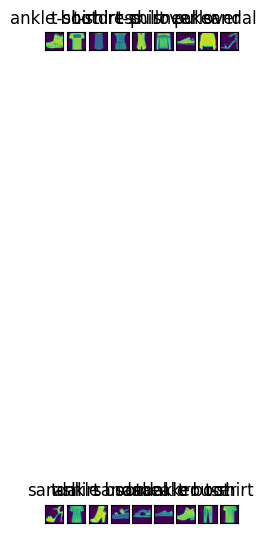

In [15]:
import matplotlib.pyplot as plt
# 获取标签
def get_fashion_mnist_lables(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_img(imgs, num_rols, num_cols, titles=None, scale=1.25):
    figsize = (num_rols * scale, num_cols * scale)
    _, axes = plt.subplots(num_rols, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes


X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_img(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_lables(y), scale=1.25)
